# **SpaceX  Falcon 9 First Stage Landing Prediction**


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


In [ ]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


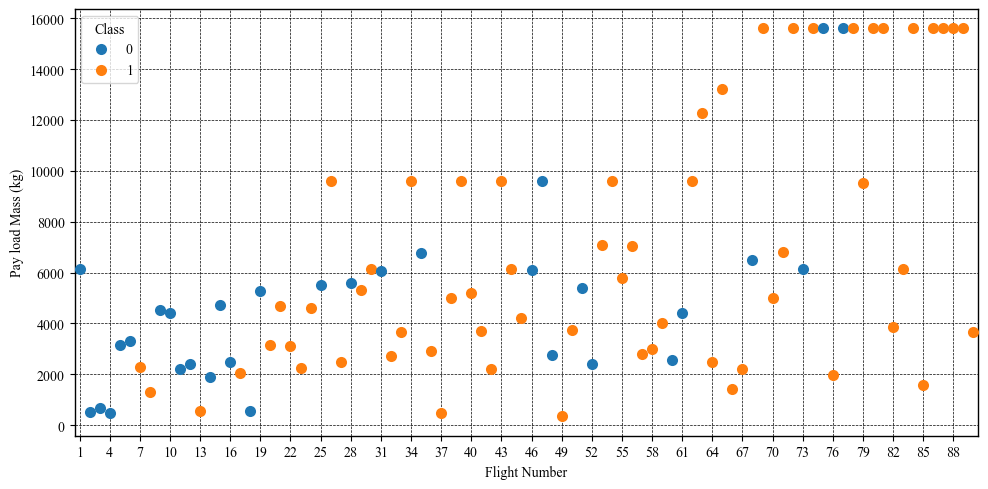

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
sns.catplot(
            y="PayloadMass",
            x="FlightNumber",
            hue="Class",
            data=df,
            aspect=2,
            height=5,
            kind="strip",
            size=8,
            legend="auto",
            legend_out=False
           )
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Pay load Mass (kg)",fontsize=10)
x_tick_positions = range(0, df["FlightNumber"].max(), 3)
plt.xticks(ticks=x_tick_positions, rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# Access and modify spines (borders)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(True)  # Show the top border
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_visible(True)  # Set the bottom border's color to red
ax.spines['bottom'].set_linewidth(1)  # Set the bottom border's color to red
ax.spines['right'].set_visible(True) # Show the right border
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_visible(True) # Show the right border
ax.spines['left'].set_linewidth(1)  # Increase the left border's width

plt.savefig("Fig1.svg")
plt.show()

### 1: Visualize the relationship between Flight Number and Launch Site

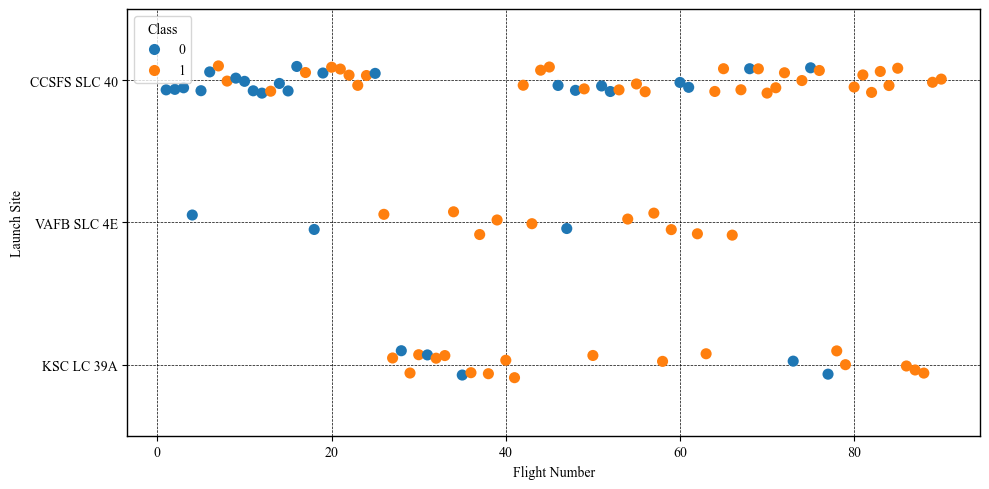

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(
            y="LaunchSite",
            x="FlightNumber",
            hue="Class",
            data=df,
            aspect=2,
            height=5,
            kind="strip",
            size=8,
            legend="auto",
            legend_out=False
           )
plt.xlabel("Flight Number", fontsize=10)
plt.ylabel("Launch Site", fontsize=10)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(color='black', linestyle='--', linewidth=0.5)

# Access and modify spines (borders)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(True)  # Show the top border
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_visible(True)  # Set the bottom border's color to red
ax.spines['bottom'].set_linewidth(1)  # Set the bottom border's color to red
ax.spines['right'].set_visible(True) # Show the right border
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_visible(True) # Show the right border
ax.spines['left'].set_linewidth(1)  # Increase the left border's width

plt.savefig("Fig2.svg")
plt.show()

### 2: Visualize the relationship between Payload Mass and Launch Site

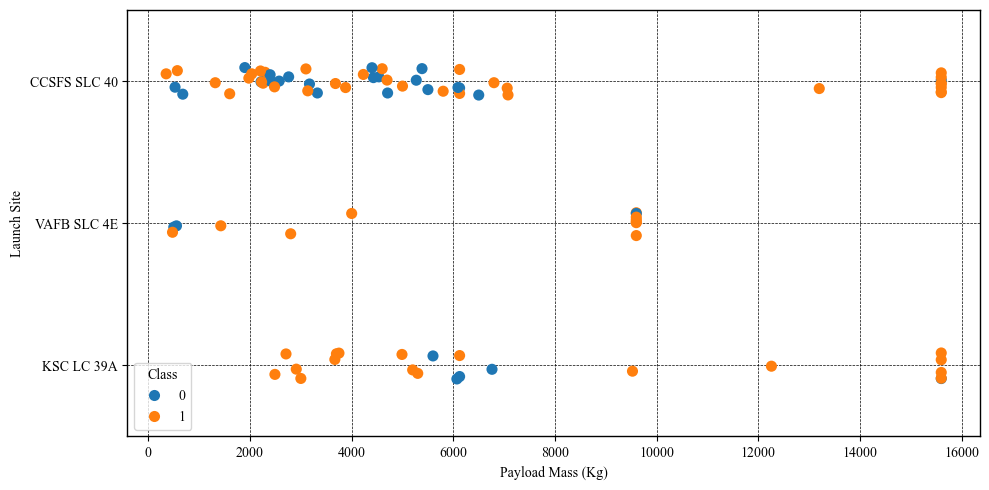

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(
            y="LaunchSite",
            x="PayloadMass",
            hue="Class",
            data=df, 
            aspect=2,
            height=5,
            kind="strip",
            size=8,
            legend="auto",
            legend_out=False
           )

plt.xlabel("Payload Mass (Kg)", fontsize=10)
plt.ylabel("Launch Site", fontsize=10)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(color='black', linestyle='--', linewidth=0.5)

# Access and modify spines (borders)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(True)  # Show the top border
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_visible(True)  # Set the bottom border's color to red
ax.spines['bottom'].set_linewidth(1)  # Set the bottom border's color to red
ax.spines['right'].set_visible(True) # Show the right border
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_visible(True) # Show the right border
ax.spines['left'].set_linewidth(1)  # Increase the left border's width

plt.savefig("Fig3.svg")

plt.show()

### 3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.


In [7]:
print (df.groupby('Orbit')['Class'].mean())

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64


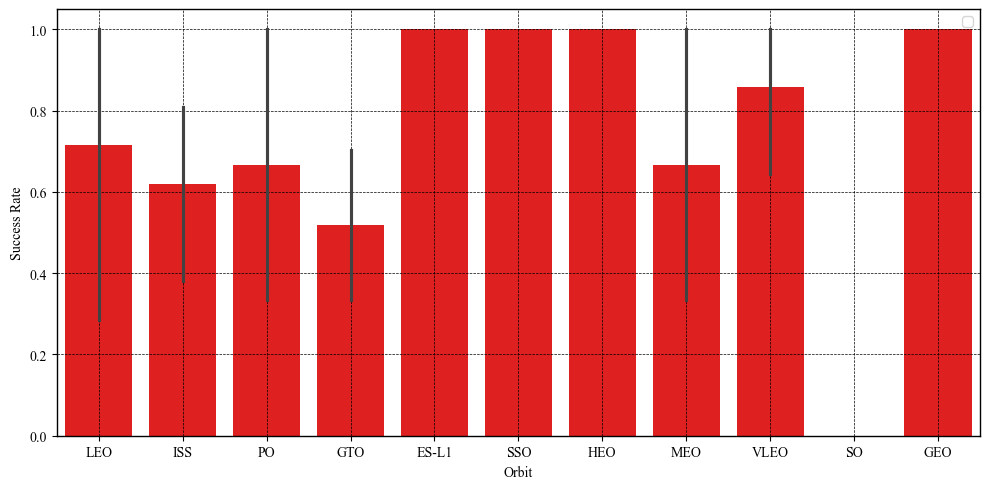

In [8]:
sns.catplot(
            y="Class",
            x="Orbit",
            #data=pd.DataFrame(df.groupby('Orbit')['Class'].mean()), 
            data=df,
            aspect=2,
            height=5,
            kind="bar",
            color="red",
            legend="auto",
            legend_out=False
           )

plt.xlabel("Orbit", fontsize=10)
plt.ylabel("Success Rate", fontsize=10)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(color='black', linestyle='--', linewidth=0.5)

# Access and modify spines (borders)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(True)  # Show the top border
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_visible(True)  # Set the bottom border's color to red
ax.spines['bottom'].set_linewidth(1)  # Set the bottom border's color to red
ax.spines['right'].set_visible(True) # Show the right border
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_visible(True) # Show the right border
ax.spines['left'].set_linewidth(1)  # Increase the left border's width

plt.savefig("Fig4.svg")

plt.show()

### 4: Visualize the relationship between FlightNumber and Orbit type

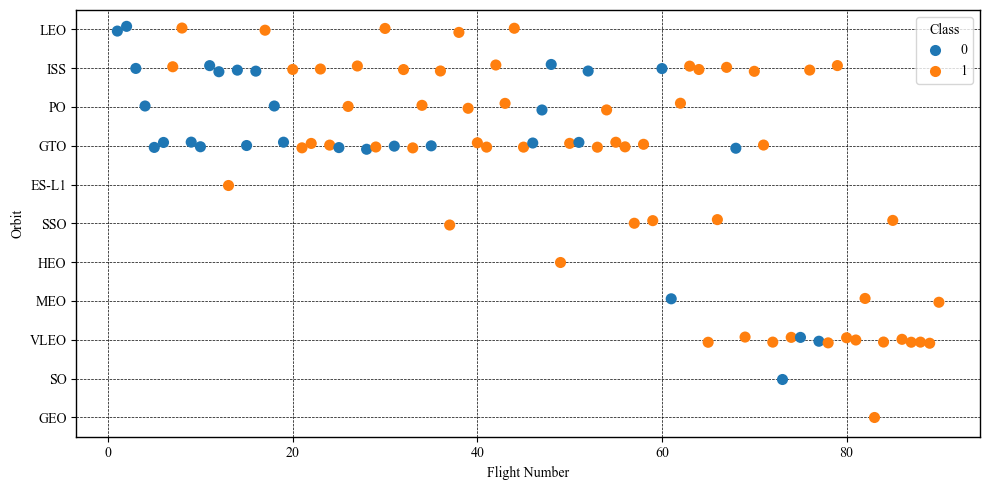

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(
            y="Orbit",
            x="FlightNumber",
            hue="Class",
            data=df,
            aspect=2,
            height=5,
            kind="strip",
            size=8,
            legend="auto",
            legend_out=False
           )

plt.xlabel("Flight Number", fontsize=10)
plt.ylabel("Orbit", fontsize=10)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(color='black', linestyle='--', linewidth=0.5)

# Access and modify spines (borders)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(True)  # Show the top border
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_visible(True)  # Set the bottom border's color to red
ax.spines['bottom'].set_linewidth(1)  # Set the bottom border's color to red
ax.spines['right'].set_visible(True) # Show the right border
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_visible(True) # Show the right border
ax.spines['left'].set_linewidth(1)  # Increase the left border's width

plt.savefig("Fig5.svg")

plt.show()

### 5: Visualize the relationship between Payload Mass and Orbit type

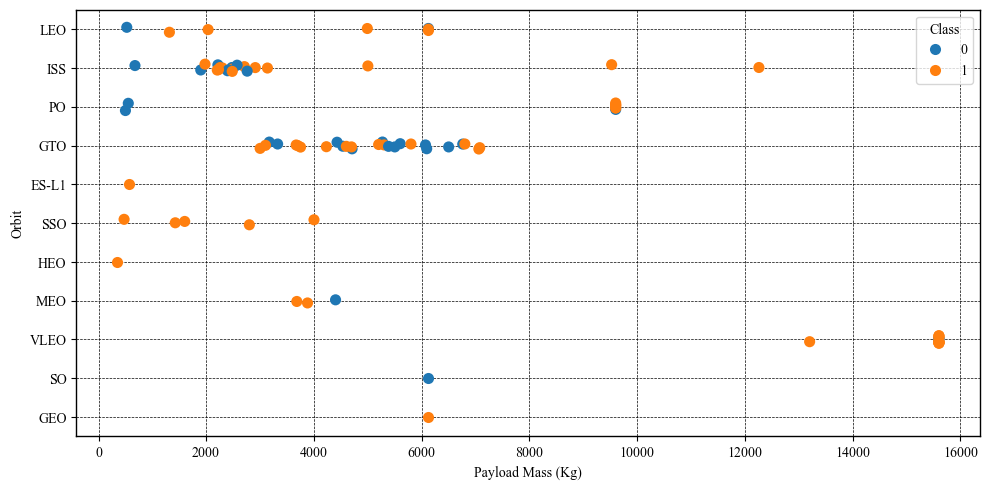

In [10]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot(
            x="PayloadMass",
            y="Orbit",
            data=df,
            hue="Class",
            aspect=2,
            height=5,
            kind="strip",
            size=8,
            legend="auto",
            legend_out=False
           )

plt.xlabel("Payload Mass (Kg)", fontsize=10)
plt.ylabel("Orbit", fontsize=10)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(color='black', linestyle='--', linewidth=0.5)

# Access and modify spines (borders)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(True)  # Show the top border
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_visible(True)  # Set the bottom border's color to red
ax.spines['bottom'].set_linewidth(1)  # Set the bottom border's color to red
ax.spines['right'].set_visible(True) # Show the right border
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_visible(True) # Show the right border
ax.spines['left'].set_linewidth(1)  # Increase the left border's width

plt.savefig("Fig6.svg")

#plt.title("Payload Mass Vs Orbit")
plt.show()

### 6: Visualize the launch success yearly trend

In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


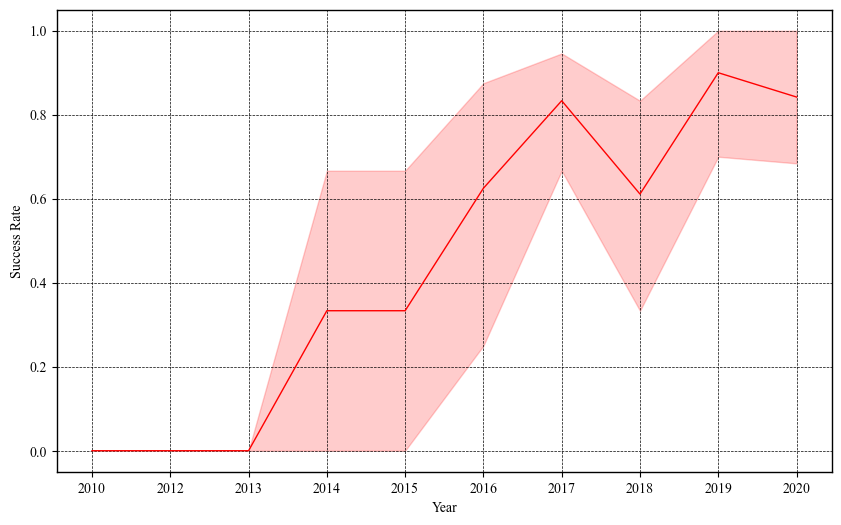

In [12]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=(10, 6))

sns.lineplot(
              x = "Date",
              y = "Class",
              data = df,
              color="red",
              linewidth=1
            )

plt.xlabel("Year", fontsize=10)
plt.ylabel("Success Rate", fontsize=10)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(color='black', linestyle='--', linewidth=0.5)

# Access and modify spines (borders)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(True)  # Show the top border
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_visible(True)  # Set the bottom border's color to red
ax.spines['bottom'].set_linewidth(1)  # Set the bottom border's color to red
ax.spines['right'].set_visible(True) # Show the right border
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_visible(True) # Show the right border
ax.spines['left'].set_linewidth(1)  # Increase the left border's width

plt.savefig("Fig7.svg")

plt.show()

## Features Engineering


In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### 7: Create dummy variables to categorical columns

In [14]:
features_one_hot = pd.get_dummies(data=features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.replace([True, False], [1, 0], inplace=True)
features_one_hot.head()

/var/folders/32/g_5ff_b9667068lbxcnk8vzr0000gn/T/ipykernel_18329/3349789779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features_one_hot.replace([True, False], [1, 0], inplace=True)


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 8: Cast all numeric columns to `float64`

In [15]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins          int64
Reused            int64
                 ...   
Serial_B1056      int64
Serial_B1058      int64
Serial_B1059      int64
Serial_B1060      int64
Serial_B1062      int64
Length: 80, dtype: object

In [16]:
features_one_hot = features_one_hot.astype(float)

In [17]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)